# 📝 Exercise M7.01

This notebook aims at building baseline classifiers, which we'll use to
compare our predictive model. Besides, we will check the differences with
the baselines that we saw in regression.

We will use the adult census dataset, using only the numerical features.

In [46]:
import pandas as pd

adult_census = pd.read_csv("../datasets/adult-census-numeric-all.csv")
data, target = adult_census.drop(columns="class"), adult_census["class"]
data, target

(       age  education-num  capital-gain  capital-loss  hours-per-week
 0       25              7             0             0              40
 1       38              9             0             0              50
 2       28             12             0             0              40
 3       44             10          7688             0              40
 4       18             10             0             0              30
 ...    ...            ...           ...           ...             ...
 48837   27             12             0             0              38
 48838   40              9             0             0              40
 48839   58              9             0             0              40
 48840   22              9             0             0              20
 48841   52              9         15024             0              40
 
 [48842 rows x 5 columns],
 0         <=50K
 1         <=50K
 2          >50K
 3          >50K
 4         <=50K
           ...  
 48837     <=50K


First, define a `ShuffleSplit` cross-validation strategy taking half of the
sample as a testing at each round.

In [47]:
# Write your code here.

from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=30, test_size=0.5, random_state=0)

Next, create a machine learning pipeline composed of a transformer to
standardize the data followed by a logistic regression.

In [48]:
# Write your code here.

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

model = make_pipeline(
    StandardScaler(),
    LogisticRegression()
)



Get the test score by using the model, the data, and the cross-validation
strategy that you defined above.

In [50]:
# Write your code here.

from sklearn.model_selection import cross_val_score

score = cross_val_score(model, data, target, cv=cv)
score_model = pd.Series(score, name="Model score")
score_model

0     0.815937
1     0.813849
2     0.815036
3     0.815569
4     0.810982
5     0.814709
6     0.813112
7     0.810327
8     0.812416
9     0.816388
10    0.812784
11    0.815732
12    0.814340
13    0.812497
14    0.813849
15    0.814995
16    0.816060
17    0.816060
18    0.815814
19    0.810368
20    0.812538
21    0.812211
22    0.809467
23    0.812170
24    0.812620
25    0.812907
26    0.812006
27    0.811597
28    0.818025
29    0.813644
Name: Model score, dtype: float64

Using the `sklearn.model_selection.permutation_test_score` function,
check the chance level of the previous model.

In [51]:
# Write your code here.

from sklearn.model_selection import permutation_test_score

score, permutation_score, pvalue = permutation_test_score(model, data, target, cv=cv, n_jobs=2, n_permutations=5)
score_permutation = pd.Series(permutation_score, name="Permuted score")
pvalue

0.03225806451612903

Finally, compute the test score of a dummy classifier which would predict
the most frequent class from the training set. You can look at the
`sklearn.dummy.DummyClassifier` class.

In [52]:
# Write your code here.

from sklearn.dummy import DummyClassifier

dummy = DummyClassifier(strategy='most_frequent')
score = cross_val_score(dummy, data, target, cv=cv)
score_dummy = pd.Series(score, name="Dummy score")
score_dummy

0     0.760329
1     0.756808
2     0.759142
3     0.760739
4     0.761681
5     0.761885
6     0.757463
7     0.757176
8     0.761885
9     0.763114
10    0.761271
11    0.764506
12    0.761394
13    0.758814
14    0.759183
15    0.761558
16    0.761640
17    0.763318
18    0.760575
19    0.755620
20    0.758241
21    0.757545
22    0.758650
23    0.760657
24    0.760043
25    0.760084
26    0.760493
27    0.757586
28    0.764424
29    0.761885
Name: Dummy score, dtype: float64

Now that we collected the results from the baselines and the model, plot
the distributions of the different test scores.

We concatenate the different test score in the same pandas dataframe.

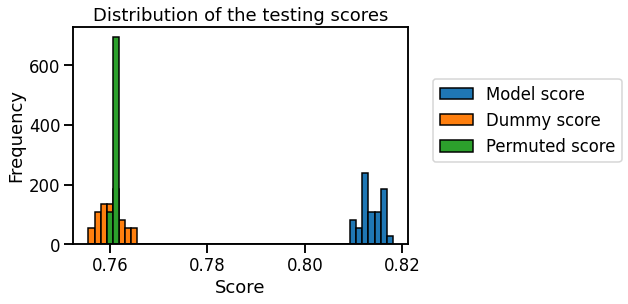

In [53]:
# Write your code here.

import matplotlib.pyplot as plt

final_errors = pd.concat([score_model, score_dummy, score_permutation],axis=1)
final_errors.plot.hist(bins=50, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Score")
_ = plt.title("Distribution of the testing scores")

Next, plot the distributions of the test scores.

In [54]:
# Write your code here.

Change the strategy of the dummy classifier to `stratified`, compute the
results and plot the distribution together with the other results. Explain
why the results get worse.

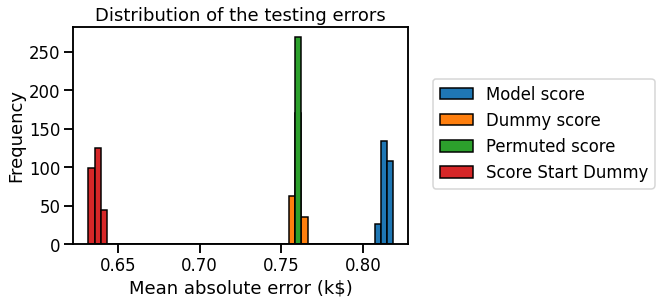

In [55]:
# Write your code here.

strat_dummy = DummyClassifier(strategy="stratified")
score = cross_val_score(strat_dummy, data, target, cv=cv)
score_strat_dummy = pd.Series(score, name="Score Start Dummy")

final_errors = pd.concat([score_model, score_dummy, score_permutation, score_strat_dummy],axis=1)
final_errors.plot.hist(bins=50, density=True, edgecolor="black")
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
plt.xlabel("Mean absolute error (k$)")
_ = plt.title("Distribution of the testing errors")